Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints. 

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield. 

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called soil_measures.csv, which contains: 

"N": Nitrogen content ratio in the soil \
"P": Phosphorous content ratio in the soil \
"K": Potassium content ratio in the soil \
"pH" value of the soil \
"crop": categorical values that contain various crops (target variable). 

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the "crop" column is the optimal choice for that field. 

In this project, you will build multi-class classification models to predict the type of "crop" and identify the single most importance feature for predictive performance.

In [1]:
# All required libraries are imported here for you.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")


In [3]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [33]:
crops.tail()

,N,P,K,ph,crop
2195,107,34,32,6.780064,5
2196,99,15,27,6.086922,5
2197,118,33,30,6.362608,5
2198,117,32,34,6.758793,5
2199,104,18,30,6.779833,5


In [4]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [5]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [6]:
crops.isnull().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [7]:
crops.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

In [8]:
crops.value_counts('crop')

crop
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
dtype: int64

In [9]:
features= crops[['N','P','K','ph']]

In [10]:
print(features)

        N   P   K        ph
0      90  42  43  6.502985
1      85  58  41  7.038096
2      60  55  44  7.840207
3      74  35  40  6.980401
4      78  42  42  7.628473
...   ...  ..  ..       ...
2195  107  34  32  6.780064
2196   99  15  27  6.086922
2197  118  33  30  6.362608
2198  117  32  34  6.758793
2199  104  18  30  6.779833

[2200 rows x 4 columns]


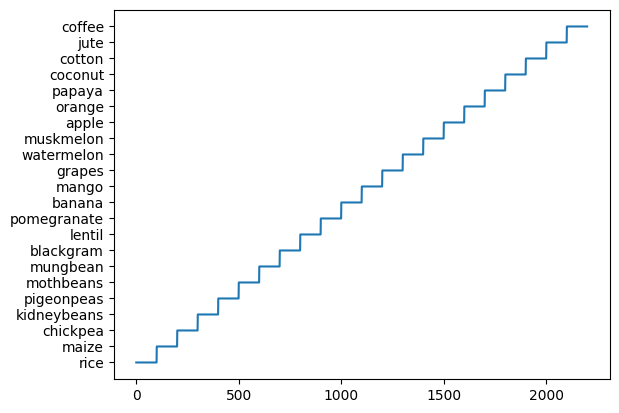

In [11]:
plt.plot(crops['crop'])
plt.show()

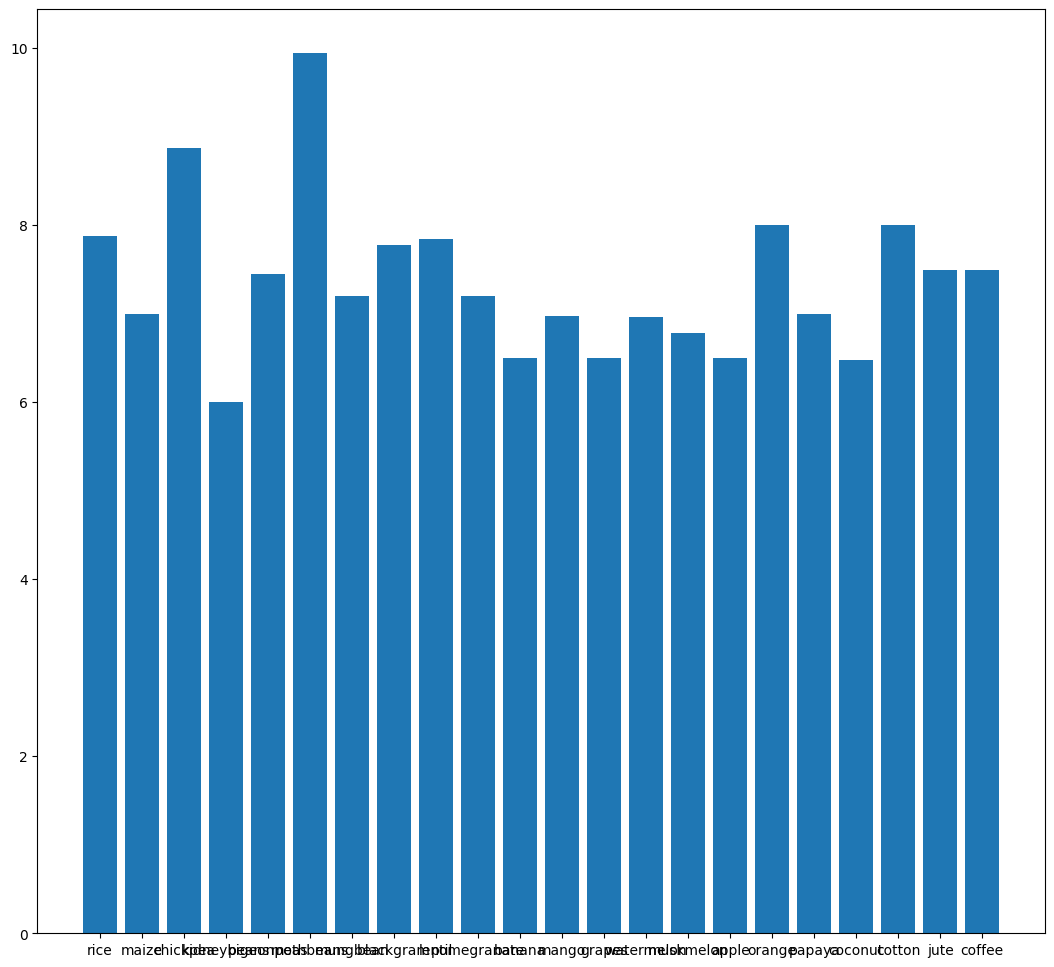

In [12]:
plt.figure(figsize=(13,12))
plt.bar(crops['crop'],crops['ph'])
plt.show()

In [13]:
# Encode target variable if necessary
# if crops['crop'].dtype == 'object':
#     crops['crop'] = crops['crop'].astype('category').cat.codes
if crops['crop'].dtype == 'object':
    crops['crop'] = crops['crop'].astype('category')
    crop_mapping = dict(enumerate(crops['crop'].cat.categories))  # Create the mapping
    crops['crop'] = crops['crop'].cat.codes

In [14]:
crops

,N,P,K,ph,crop
0,90,42,43,6.502985,20
1,85,58,41,7.038096,20
2,60,55,44,7.840207,20
3,74,35,40,6.980401,20
4,78,42,42,7.628473,20
...,...,...,...,...,...
2195,107,34,32,6.780064,5
2196,99,15,27,6.086922,5
2197,118,33,30,6.362608,5
2198,117,32,34,6.758793,5


In [15]:
# Splitting the dataset into features (X) and target (y)
X = crops[['N', 'P', 'K', 'ph']]  # Features
y = crops['crop']  # Target variable

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train, y_train)

D:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [18]:
y_pred_logistic =logistic_model.predict(X_test)

In [19]:
print("\nLogistic Regression Metrics:")
print(classification_report(y_test, y_pred_logistic))



Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.62      0.22      0.32        23
           1       0.95      1.00      0.98        21
           2       0.58      0.55      0.56        20
           3       1.00      1.00      1.00        26
           4       0.62      0.59      0.60        27
           5       0.88      0.88      0.88        17
           6       0.76      0.94      0.84        17
           7       0.38      0.79      0.51        14
           8       0.52      0.61      0.56        23
           9       0.36      0.40      0.38        20
          10       0.28      0.64      0.39        11
          11       0.89      0.81      0.85        21
          12       0.52      0.68      0.59        19
          13       0.57      0.17      0.26        24
          14       0.35      0.47      0.40        19
          15       0.39      0.41      0.40        17
          16       0.88      1.00      0.93        

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

Accuracy: 0.615909090909091


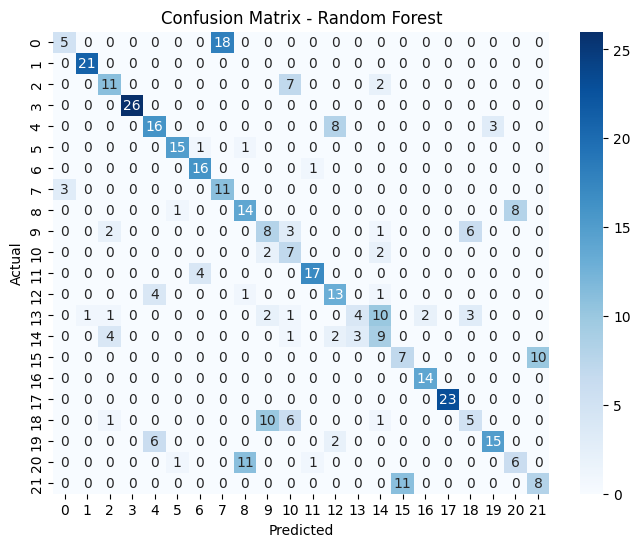

In [21]:
# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [22]:
# Random Forest Classifier (for feature importance)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
y_pred_rf = rf_model.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8181818181818182


In [25]:
# Evaluate Random Forest
print("\nRandom Forest Metrics:")
print(classification_report(y_test, y_pred_rf))



Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       1.00      1.00      1.00        21
           2       0.90      0.90      0.90        20
           3       1.00      1.00      1.00        26
           4       0.82      0.85      0.84        27
           5       0.84      0.94      0.89        17
           6       0.89      1.00      0.94        17
           7       0.53      0.64      0.58        14
           8       0.59      0.70      0.64        23
           9       0.80      1.00      0.89        20
          10       0.47      0.73      0.57        11
          11       1.00      0.95      0.98        21
          12       0.82      0.74      0.78        19
          13       0.91      0.83      0.87        24
          14       0.78      0.95      0.86        19
          15       0.62      0.59      0.61        17
          16       1.00      1.00      1.00        14
   

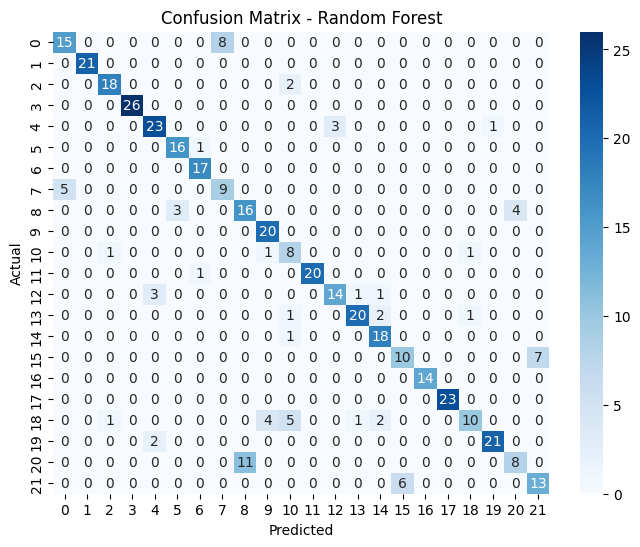

In [26]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [27]:
# Feature Importance from Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X.columns

In [28]:
# Display Feature Importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)



Feature Importance:
  Feature  Importance
2       K    0.324087
1       P    0.253015
0       N    0.214310
3      ph    0.208588


C:\Users\shrey\AppData\Local\Temp\ipykernel_19432\2983482377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


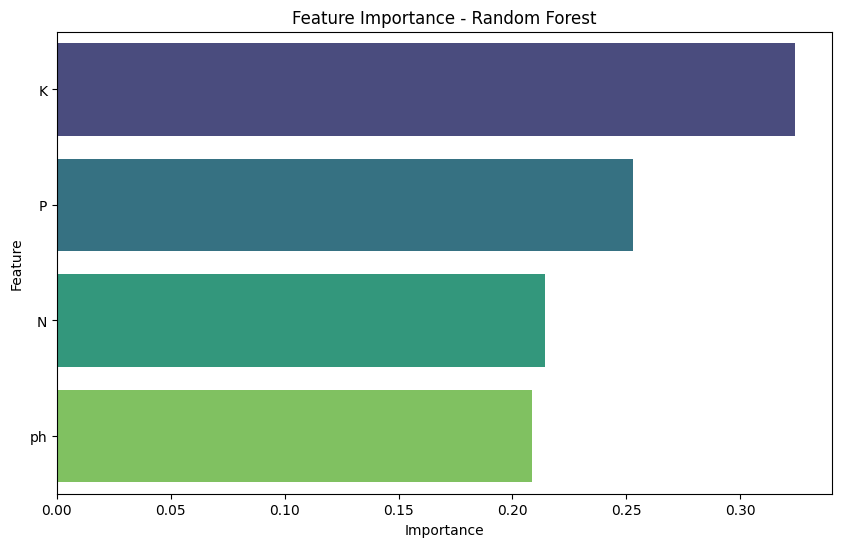

In [29]:
# Bar Plot for Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [30]:
# Identify Single Most Important Feature
most_important_feature = importance_df.iloc[0]
print(f"\nThe most important feature for predicting crop type is '{most_important_feature['Feature']}' with an importance score of {most_important_feature['Importance']:.2f}.")


The most important feature for predicting crop type is 'K' with an importance score of 0.32.


In [31]:
# Save the model for future use
joblib.dump(rf_model, 'crop_recommendation_model.pkl')

# Load the model (you can skip training again in the future)
model = joblib.load('crop_recommendation_model.pkl')


In [32]:
# Function to recommend a crop based on user input
def recommend_crop():
    print("\nEnter soil details to get crop recommendation:")
    try:
        nitrogen = float(input("Enter Nitrogen content (N): "))
        phosphorous = float(input("Enter Phosphorous content (P): "))
        potassium = float(input("Enter Potassium content (K): "))
        ph_value = float(input("Enter pH value: "))

        # Prepare input for prediction
        input_data = np.array([[nitrogen, phosphorous, potassium, ph_value]])
        
        # Predict the crop
        crop_code = model.predict(input_data)[0]
        recommended_crop = crop_mapping[crop_code]
        
        print(f"\nRecommended Crop: {recommended_crop}")
    except ValueError:
        print("Invalid input. Please enter numeric values for soil metrics.")

# Call the function to get user input and recommend a crop
recommend_crop()



Enter soil details to get crop recommendation:
Enter Nitrogen content (N): 85
Enter Phosphorous content (P): 58
Enter Potassium content (K): 41
Enter pH value: 7.0381

Recommended Crop: rice


D:\Users\shrey\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
